# Boston Housing Data

The dataset used for the project comprises of housing data for suburbs in the city of Boston in the United States. The columns are as follows:

* _crim_: per capita crime rate by town.
* _zn_: proportion of residential land zoned for lots over 25,000 sq.ft.
* _indus_: proportion of non-retail business acres per town.
* _chas_: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* _nox_: nitrogen oxides concentration (parts per 10 million).
* _rm_: average number of rooms per dwelling.
* _age_: proportion of owner-occupied units built prior to 1940.
* _dis_: weighted mean of distances to five Boston employment centres.
* _rad_: index of accessibility to radial highways.
* _tax_: full-value property-tax rate per \$10,000.
* _ptratio_: pupil-teacher ratio by town.
* _b_: 1000(Bk - 0.63)^2 where Bk is the proportion of ethnic African-Americans by town.
* _lstat_: lower status of the population (percent).
* _medv_: median value of owner-occupied homes in \$1000s.

## Importing, Cleaning, & Basic Visualization

In [23]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [24]:
houses = pd.read_csv("housing2.csv")
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Column1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [25]:
houses.Column1.unique()

array([nan])

In [26]:
houses.drop(["Column1"], axis = 1, inplace = True)
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
ROWS = 2
COLS = 7
index = 0

fig = make_subplots(rows=ROWS, 
                    cols=COLS, 
                    # subplot_titles=houses.columns
                    )

for row in range(ROWS):
  for col in range(COLS):
    fig.add_trace(
        go.Box(y=houses.iloc[:, index].values, name=houses.columns[index]),
        row=row+1, col=col+1
    )
    index += 1

fig.update_layout(height=600, width=1000, title_text="Side By Side Subplots", showlegend=False)
fig.show()

## Question #1

Choose a variable other than CHAS and MEDV. 


1. Compute the mean and standard deviation of the variable.
2. Plot a histogram of the variable.
3. What is the sample correlation between your chosen variable and median home price?
4. Perform a regression, predicting MEDV from your chosen variable.
5. Plot a scatterplot of your chosen variable against MEDV, and include the regression line.


In [28]:
# Question 1.1: Mean and standard deviation of PTRATIO
pt_mean = houses["PTRATIO"].mean()
pt_std = houses["PTRATIO"].std()
print(f'The mean of pupil teacher ratio is {pt_mean:.2f}.\nThe standard deviation is {pt_std:.2f}.')

The mean of pupil teacher ratio is 18.46.
The standard deviation is 2.16.


<Axes: xlabel='PTRATIO', ylabel='Count'>

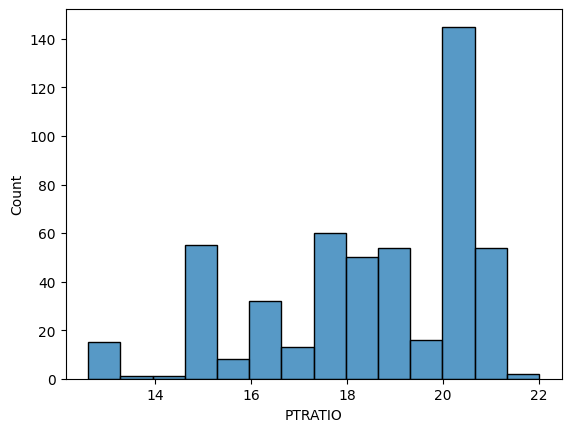

In [29]:
# Question 1.2 Histogram of PTRATIO
import seaborn as sns

sns.histplot(data=houses, x="PTRATIO")

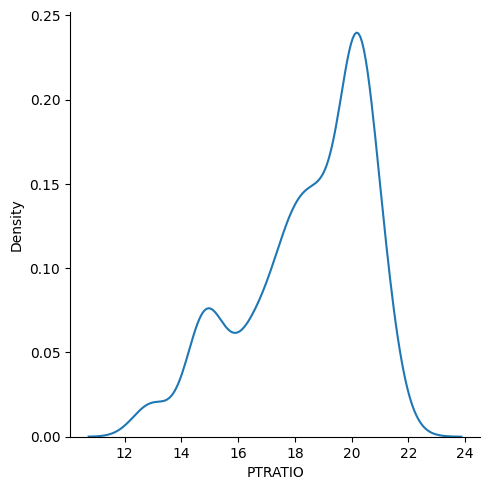

In [30]:
# KDE plot of PTRATIO
sns.displot(houses, x="PTRATIO", kind="kde")

In [31]:
# Question 1.3 Correlation matrix for PTRATIO and MEDV
pt_med_corr = houses[["PTRATIO", "MEDV"]].corr()
print(pt_med_corr)

          PTRATIO      MEDV
PTRATIO  1.000000 -0.507787
MEDV    -0.507787  1.000000


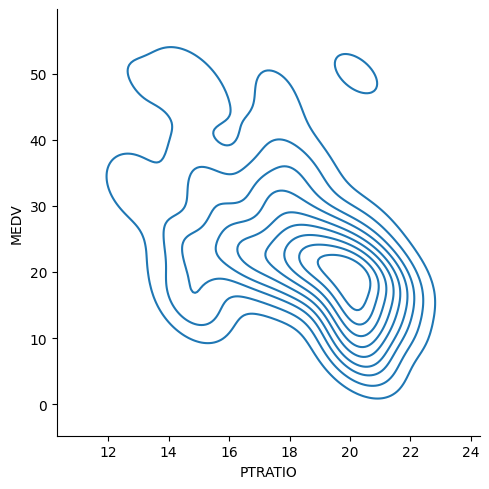

In [32]:
# Distribution plot for PTRATIO and MEDV
sns.displot(houses, x="PTRATIO", y="MEDV", kind="kde")

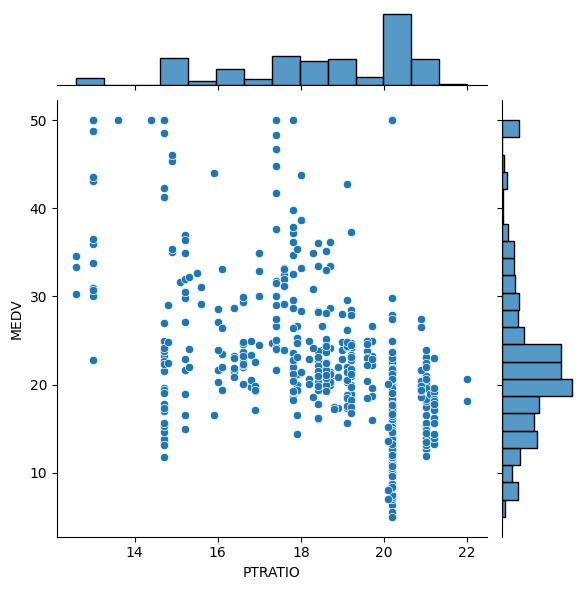

In [33]:
# Joint plot for PTRATIO and MEDV
sns.jointplot(data=houses, x="PTRATIO", y="MEDV")

In [34]:
# Question 1.4 Regression, predicting MEDV from PTRATIO.
from statsmodels.formula.api import ols
mdl_pt_vs_medv = ols("MEDV~PTRATIO", data=houses)
mdl_pt_vs_medv = mdl_pt_vs_medv.fit()
print(mdl_pt_vs_medv.params)

Intercept    62.344627
PTRATIO      -2.157175
dtype: float64


In [35]:
mdl_pt_vs_medv.pvalues[1]

1.6095094784725852e-34

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

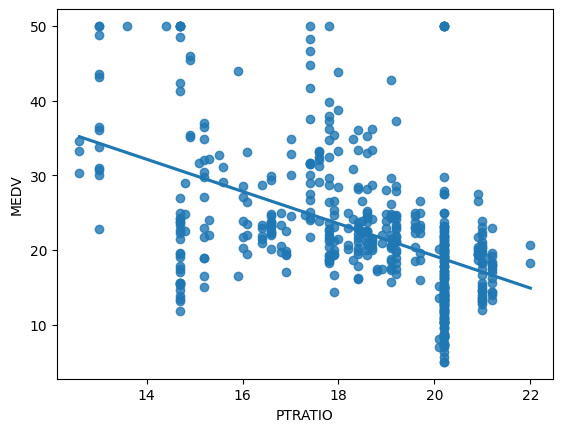

In [36]:
# Question 1.5 Scatterplot of PTRATIO against MEDV with the regression line.
sns.regplot(x="PTRATIO", 
            y="MEDV", 
            data=houses,
            ci=None)

## Question 2

You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those that do not. 


1.   What is the null hypothesis?
2.   Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.
3. What is the 90% confidence interval for the target (price) of tracts that border the Charles River?
4. Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?

## Note

It is important to note that the CHAS is highly imbalanced. See calucations and bar plot below. Bootstrap sampling is used to address this imbalance. See code below.

In [37]:
import plotly.express as px
fig = px.histogram(houses, x="CHAS", labels={"CHAS": "Location Relative to Charles River"})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Not on Charles', 'On Charles River']
    )
)
fig.show()


In [38]:
houses["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [39]:
on_charles = houses[houses["CHAS"] == 1]
no_charles = houses[houses["CHAS"] == 0]

In [40]:
print(f'Number of houses on the Charles {len(on_charles)}.\nNumber of houses not on the Charles {len(no_charles)}.')

Number of houses on the Charles 35.
Number of houses not on the Charles 471.


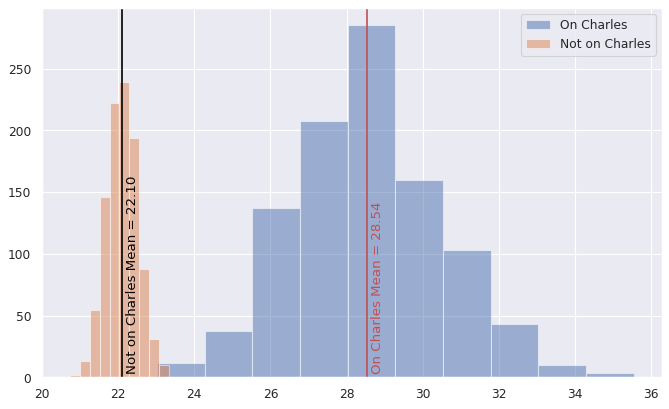

In [42]:
# Bootstrap means for categories, On Charles and Not on Charles.
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
sns.set_theme()

mean_on_charles, mean_no_charles = [], []
for i in range(1000):
  mean_on_charles.append(np.mean(on_charles.sample(frac=1, replace=True)['MEDV']))
  mean_no_charles.append(np.mean(no_charles.sample(frac=1, replace=True)['MEDV']))

plt.hist(mean_on_charles, alpha=0.5, label='On Charles')
plt.axvline(np.mean(mean_on_charles), color='r')
plt.text(np.mean(mean_on_charles) + .1, 5 , f'On Charles Mean = {np.mean(mean_on_charles):.2f}', rotation=90, color='r')
plt.hist(mean_no_charles, alpha=0.5, label='Not on Charles')
plt.axvline(np.mean(mean_no_charles), color='black')
plt.text(np.mean(mean_no_charles) + .1, 5 , f'Not on Charles Mean = {np.mean(mean_no_charles):.2f}', rotation=90, color='black')
plt.legend(loc='upper right')
plt.show()

In [43]:
'''
Question 2.1 Null hypothesis. The null hypothesis is that there is no difference
between the sample means of the classes, On Charles and Not on Charles.
The alternative hypothosis is that the sample mean of the On Charles class
is greater than the sample mean of the Not on Charles class

Question 2.2 P-value calculation. The bootstrap sample means of the target, 
MEDV are used as estimates of the population means.
'''

import numpy as np
from scipy.stats import norm

on_charles_samp_mean = np.mean(mean_on_charles)
no_charles_samp_mean = np.mean(mean_no_charles)

mean_boot_dist = []

for i in range(1000):
  mean_boot_dist.append(np.mean(houses.sample(frac=1, replace=True)['MEDV']))

std_error = np.std(mean_boot_dist, ddof=1)
z_score = (on_charles_samp_mean - no_charles_samp_mean) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print(f'Calculated p-value: {p_value}. Norm.sf p-value {norm.sf(abs(z_score))}')

Calculated p-value: 0.0. Norm.sf p-value 3.510293323344976e-57


In [44]:
# Bootstrap standard deviations for categories, On Charles and Not on Charles.
on_charles_sd = np.std(mean_on_charles, ddof=1) * np.sqrt(1000)
no_charles_sd = np.std(mean_no_charles, ddof=1) * np.sqrt(1000)
print(f'The standard deviation for houses on the Charles River is {on_charles_sd}.')
print(f'The standard deviation for houses not on the Charles River is {no_charles_sd}.')

The standard deviation for houses on the Charles River is 61.93681295424832.
The standard deviation for houses not on the Charles River is 12.816031150095359.


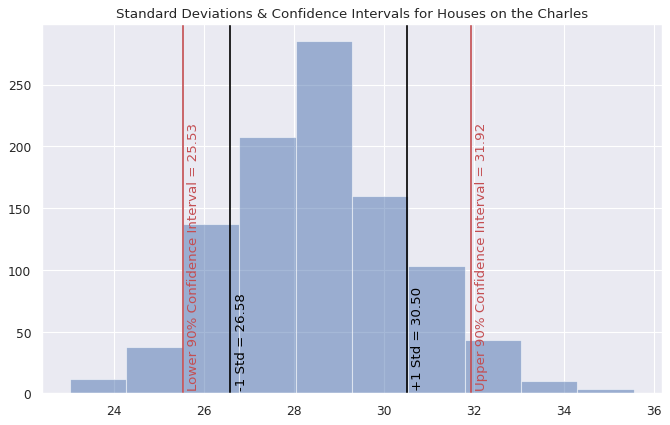

In [45]:
# 2.3 90% confidence interval for the mean of tracts that border the Charles River

figure(figsize=(10, 6), dpi=80)
sns.set_theme()

on_charles_low_std = np.mean(mean_on_charles) - np.std(mean_on_charles, ddof=1)
on_charles_up_std = np.mean(mean_on_charles) + np.std(mean_on_charles, ddof=1)
oc_ci_95 = np.quantile(mean_on_charles, .95)
oc_ci_05 = np.quantile(mean_on_charles, .05)

plt.hist(mean_on_charles, alpha=0.5, label='On Charles')
plt.axvline(on_charles_low_std, color='black')
plt.text(on_charles_low_std + .1, 5 , f'-1 Std = {on_charles_low_std:.2f}', rotation=90, color='black')
plt.axvline(on_charles_up_std, color='black')
plt.text(on_charles_up_std + .1, 5 , f'+1 Std = {on_charles_up_std:.2f}', rotation=90, color='black')
plt.axvline(oc_ci_95 , color='r')
plt.text(oc_ci_95 + .1, 5, f'Upper 90% Confidence Interval = {oc_ci_95:.2f}', rotation=90, color='r')
plt.axvline(oc_ci_05 , color='r')
plt.text(oc_ci_05 + .1, 5, f'Lower 90% Confidence Interval = {oc_ci_05:.2f}', rotation=90, color='r')
plt.title('Standard Deviations & Confidence Intervals for Houses on the Charles')
plt.show()

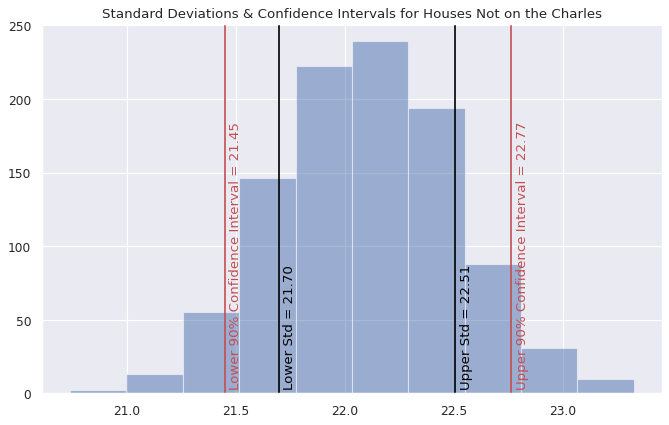

In [46]:
# 90% confidence interval for the mean of tracts that do not border the Charles River

figure(figsize=(10, 6), dpi=80)
sns.set_theme()

no_charles_low_std = np.mean(mean_no_charles) - np.std(mean_no_charles, ddof=1)
no_charles_up_std = np.mean(mean_no_charles) + np.std(mean_no_charles, ddof=1)
nc_ci_95 = np.quantile(mean_no_charles, .95)
nc_ci_05 = np.quantile(mean_no_charles, .05)

plt.hist(mean_no_charles, alpha=0.5, label='On Charles')
plt.axvline(no_charles_low_std , color='black')
plt.text(no_charles_low_std + .02, 5 , f'Lower Std = {no_charles_low_std:.2f}', rotation=90, color='black')
plt.axvline(no_charles_up_std, color='black')
plt.text(no_charles_up_std + .02, 5 , f'Upper Std = {no_charles_up_std:.2f}', rotation=90, color='black')
plt.axvline(nc_ci_95 , color='r')
plt.text(nc_ci_95 + .02, 5, f'Upper 90% Confidence Interval = {nc_ci_95:.2f}', rotation=90, color='r')
plt.axvline(nc_ci_05 , color='r')
plt.text(nc_ci_05 + .02, 5, f'Lower 90% Confidence Interval = {nc_ci_05:.2f}', rotation=90, color='r')
plt.title('Standard Deviations & Confidence Intervals for Houses Not on the Charles')
plt.show()

In [47]:
# Question 2.4 Required group size for effect size (Cohen’s d) of 0.6 and 80% power

from statsmodels.stats.power import TTestIndPower

obj = TTestIndPower()
n = obj.solve_power(effect_size=0.6, alpha=0.01, power=0.8, 
                    ratio=1, alternative='larger')
print(f'The required group size is {n}.')

The required group size is 57.1286722359903.


/home/isaac/Code/portfolio/port-env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf



## Question #3

Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. Be creative with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. Design an experiment to explore the effects of these features on the media house price in census tracts. You should include an explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power.

### Introduction Part I

There are two three notable trends in the Boston Housing Data related to schooling. First, unsurprisingly, there is a negative correlation between average mean housing prices and pupil-teacher ratio. The pupil teacher ratio decreases as the average mean housing price increases. A linear regression model shows that the number of students per teacher declines by .11 for every dollar increase in the mean housing price. For example, there are an average of approximately 20 students for every teacher in towns that have an average mean housing price of \$10,000. However, there are an average of only 15 students per teacher in towns with an average mean housing price of $50,000. This is unsurprising because student-teacher ratios are a strong indicator of quality schools and, in the United States, the best public schools tend to be located in the richest neighborhoods.

In [48]:
# Regression model for PTRATIO vs. MEDV
mdl_medv_vs_pt = ols("PTRATIO~MEDV", data=houses)
mdl_medv_vs_pt = mdl_medv_vs_pt.fit()
print(mdl_medv_vs_pt.params)

Intercept    21.148882
MEDV         -0.119530
dtype: float64


<Axes: xlabel='MEDV', ylabel='PTRATIO'>

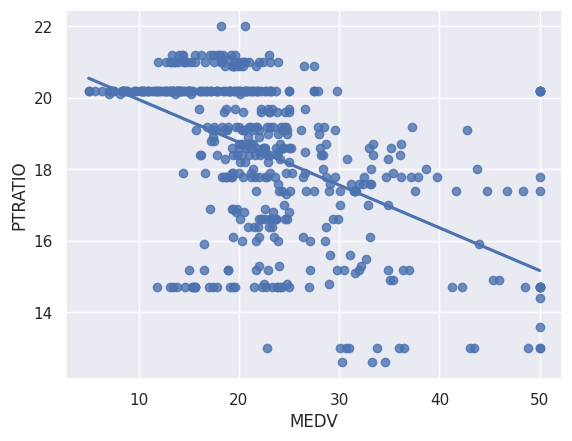

In [49]:
# Regression plot for PTRATIO vs. MEDV
sns.regplot(x="MEDV", 
            y="PTRATIO", 
            data=houses,
            ci=None)

In [50]:
# Regression plot for PTRATIO vs. MEDV
mdl_medv_vs_pt.pvalues[1]

1.6095094784734367e-34

<Axes: >

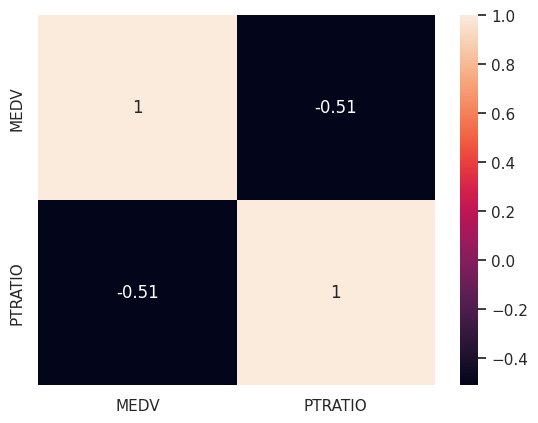

In [51]:
medv_vs_pt_corr = houses[["MEDV", "PTRATIO"]].corr()
sns.heatmap(medv_vs_pt_corr, 
        xticklabels=medv_vs_pt_corr.columns,
        yticklabels=medv_vs_pt_corr.columns, 
        annot=True)

### Introduction Part II

Second, there is a surprising positive correlation between tax expenditures and pupil-teacher ratio. In the United States, public schooling is largely paid by property tax. This is the primary reason the highest performing public schools tend to be located in the richest neighborhoods. The schools in the affluent neighborhoods are the best funded. However, on initial look, the Boston Housing Data does not follow this trend. The average student-teacher ratio actually declines as the average full-value property-tax rate per \$10,000 declines. Towns that pay an average \$200 property-tax rate per \$10,000 of property value have an average of 17 pupils for every teacher, but areas that pay an average of \$700 per \$10,000 of property value have an average of 20 students per teacher. (The latter values are admittedly less reliable because they are based on two data points.) 

<Axes: xlabel='TAX', ylabel='Count'>

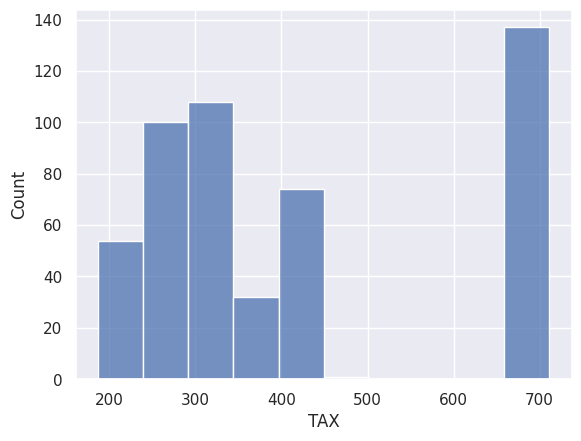

In [52]:
# Histogram of TAX
sns.histplot(data=houses, x="TAX")

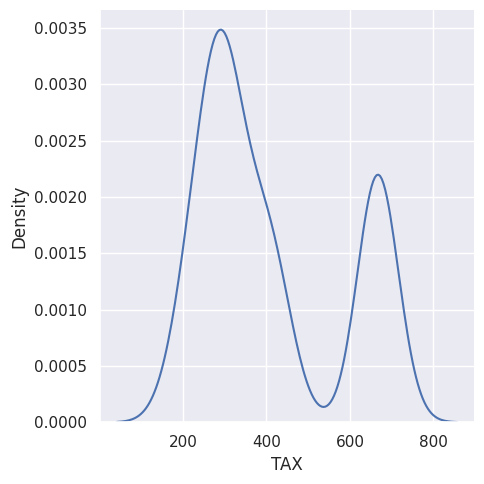

In [53]:
# Distribution plot of TAX
sns.displot(houses, x="TAX", kind="kde")

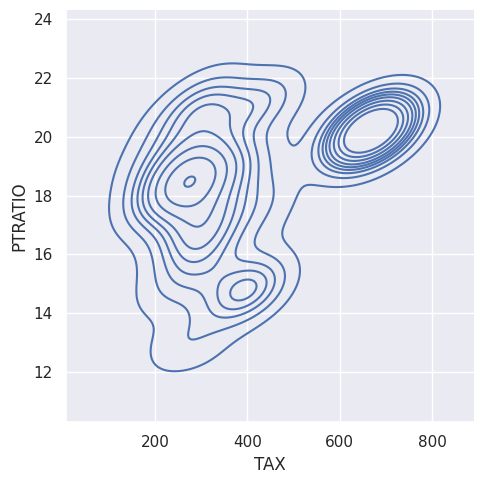

In [54]:
# Distribution plot of TAX vs. PTRATIO
sns.displot(houses, x="TAX", y="PTRATIO", kind="kde")

<Axes: xlabel='TAX', ylabel='PTRATIO'>

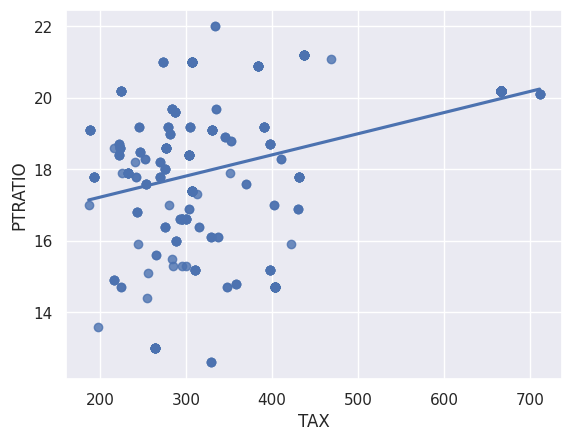

In [55]:
# Regression plot of TAX vs. PTRATIO
sns.regplot(x="TAX", 
            y="PTRATIO", 
            data=houses,
            ci=None)
            

In [56]:
# Regression model of TAX vs. PTRATIO
tax_pt_vs_medv = ols("PTRATIO~TAX", data=houses)
tax_pt_vs_medv = tax_pt_vs_medv.fit()
print(tax_pt_vs_medv.params)

Intercept    16.038813
TAX           0.005920
dtype: float64


In [34]:
# P-value for regression model of TAX vs. PTRATIO
tax_pt_vs_medv.pvalues[1]

5.686832643720614e-28

<Axes: >

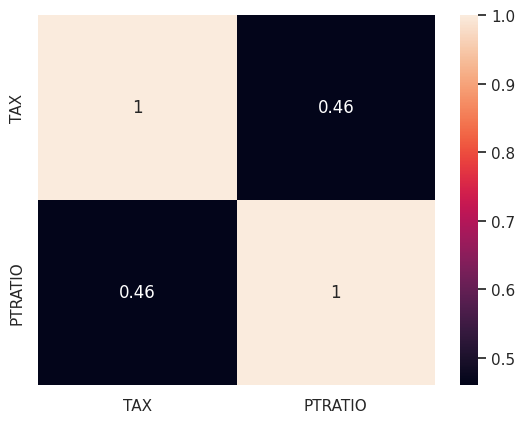

In [57]:
# Correlation matrix for of TAX vs. PTRATIO
tax_pt_corr = houses[["TAX", "PTRATIO"]].corr()
sns.heatmap(tax_pt_corr, 
        xticklabels=tax_pt_corr.columns,
        yticklabels=tax_pt_corr.columns, 
        annot=True)

### Introduction Part III

This perplexing result is explained by looking at the relationship between mean housing price and average full-value property-tax rate per \$10,000. It turns out the property-tax in the Boston area is highly regressive. There is a strong negative correlation between property values and property-tax rates. Towns with average mean housing price of \$10,000 or less pay approximately \$670 dollars per \$10,000 in property value, but areas with an average mean housing price of \$50,000 or more pay approximately \$415 dollars per \$10,000 in property value. Conservative tax policy makers will likely point out that the weather towns are paying more property-tax in absolute dollars. This is true, however, the opposite is true as well. Poorer areas, while paying a higher tax rate, have less money to pay for neighborhood public schools.

<Axes: xlabel='MEDV', ylabel='TAX'>

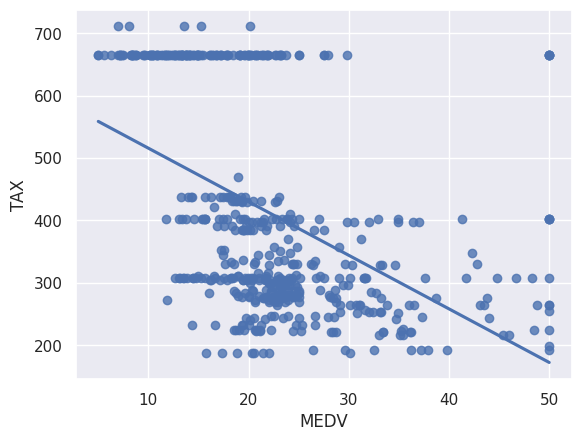

In [58]:
# Regression plot of TAX vs. MEDV
sns.regplot(x="MEDV", 
            y="TAX", 
            data=houses,
            ci=None)

In [59]:
# Regression model of TAX vs. MEDV
mdl_medv_vs_tax = ols("TAX~MEDV", data=houses)
mdl_medv_vs_tax = mdl_medv_vs_tax.fit()
print(mdl_medv_vs_tax.params)

Intercept    601.70226
MEDV          -8.58593
dtype: float64


In [60]:
# P-value for regression model of TAX vs. MEDV
mdl_medv_vs_tax.pvalues[1]

5.637733627691044e-29

In [38]:
# Mean tax rate per $10,000 of property value for towns with 
# mean value of $10,000 or less
houses[houses["MEDV"] <= 10]["TAX"].mean()

669.75

In [61]:
# Mean tax rate per $10,000 of property value for towns with 
# mean value of $50,000 or more
houses[houses["MEDV"] >= 50]["TAX"].mean()

415.4375

<Axes: >

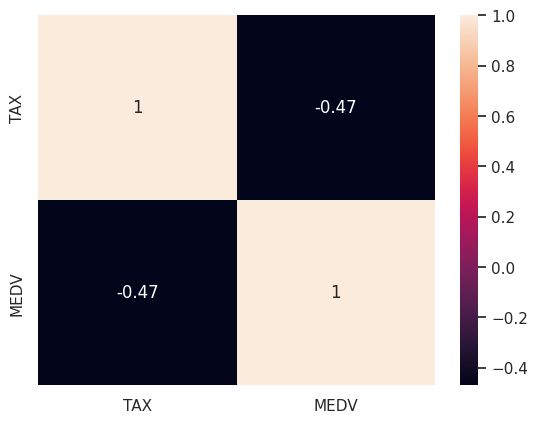

In [62]:
#Correlation matrix for TAX vs. MEDV
tax_medv_corr = houses[["TAX", "MEDV"]].corr()
sns.heatmap(tax_medv_corr, 
        xticklabels=tax_medv_corr.columns,
        yticklabels=tax_medv_corr.columns, 
        annot=True)

### Answer 

This leads to the fantasy experiment I would like to run. The “feature” I would like to add is higher spending on schools. I propose a randomized controlled experiment in which \$20,000 per student is spent in half the towns in the Boston area. Currently, an average of \$14,840 dollars is spent per student across the United States. This includes federal, state, and local money. The null hypothesis would be that the increased spending would have no effect on housing prices. The alternative hypothesis is increased spending on education would increase housing prices. Put another way, school spending drives, rather than follows, housing costs.

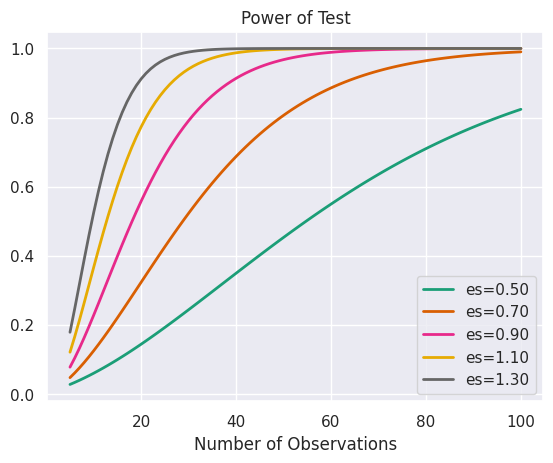

In [63]:
# Question 3 Plot the effect size (es), power, and number of samples 
# for the imaginary experiment

from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()

power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(5, 101),
    effect_size=np.arange(0.5, 1.5, .2),
    alpha=0.01,
)

plt.show()